In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
sns.set()

# Представление данных в Scikit-Learn (data representation)

Строки матрицы - выборки (samples), а количество строк - n_samples.

Столбцы матрицы - признаки (features), а количество столбцов - n_features.

Информацию можно рассматривать как двумерный числовой массив или матрицу - матрицу признаков (features matrix) - с формой
[n_samples, n_features].

Выборки (то есть строки) всегда соответствуют отдельным объектам, описываемым набором данных.

Признаки (то есть столбцы) всегда соответствуют конкретным наблюдениям, описывающим каждую из выборок количественным образом. Значения признаков обычно представляют собой вещественные числа, но в некоторых случаях они могут быть булевыми или иметь дискретные значения.

Помимо матрицы признаков **x**, обычно мы имеем дело с целевым массивом (массивом меток), который принято обозначать **y**. Целевой массив обычно одномерен, длиной n_samples.

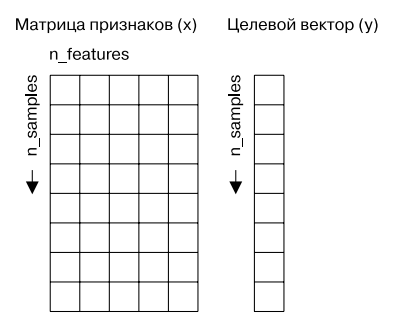

## Основы API статистического оценивания

1. Выбор класса модели с помощью импорта соответствующего класса оценивателя из библиотеки Scikit-Learn.
2. Выбор гиперпараметров модели путем создания экземпляра этого класса с соответствующими значениями.
3. Компоновка данных в матрицу признаков и целевой вектор в соответствии с описанным выше.
4. Обучение модели на своих данных посредством вызова метода fit() экземпляра модели.
5. Применение модели к новым данным:
- в случае машинного обучения с учителем метки для неизвестных данных обычно предсказывают с помощью метода predict();
- в случае машинного обучения без учителя выполняется преобразование свойств данных или вывод их значений посредством методов transform() или predict().

## Пример простой линейной регрессии

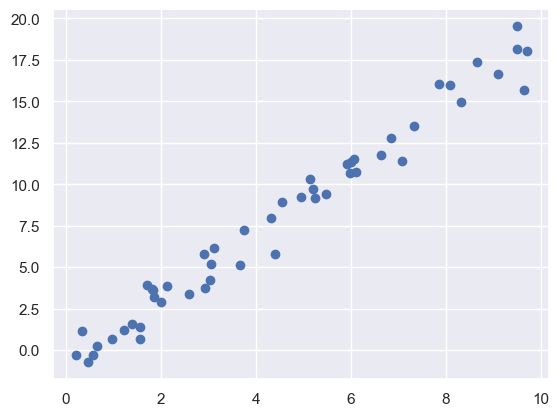

In [17]:
rng = np.random.RandomState(42)
x = 10 * rng.rand(50)
y = 2 * x - 1 + rng.randn(50)
plt.scatter(x, y)

coef = [1.9776566]
intercept = -0.903310725531111


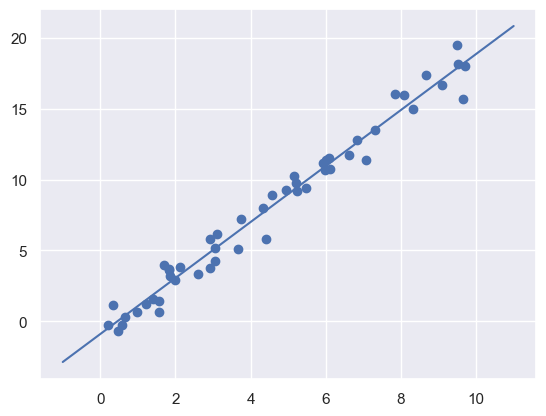

In [22]:
# 1. выбор класса модели
from sklearn.linear_model import LinearRegression

# 2. выбор гипрепараметров модели и создание экземпляра модели
model = LinearRegression(fit_intercept=True)  # fit_intercept - выполнить подбор точки пересечения с осью координат

# 3. формирование из данных матриц признаков и целевого вектора
X = x[:, np.newaxis]  # небольшие манипуляции с данными x, чтобы сделать из них матрицу размера [n_samples, n_features]

# 4. обучение модели на данных
model.fit(X, y)
print(f"coef = {model.coef_}")
print(f"intercept = {model.intercept_}")

# 5. предсказание меток для новых данных
xfit = np.linspace(-1, 11)
Xfit = xfit[:, np.newaxis]
yfit = model.predict(Xfit)

# 6. визуализируем результаты
plt.scatter(x, y)  # исходные данные
plt.plot(xfit, yfit)  # обученная модель

## Классификация набора данных Iris

Гауссов наивный байесовский классификатор, исходящий из допущения, что все классы взяты из выровненного по осям координат Гауссова распределения. Гауссов наивный байесовский классификатор в силу отсутствия гиперпараметров и высокой производительности — хороший кандидат на роль эталонной классификации. 

In [11]:
# рассмотрим набор данных Iris, проанализированный Рональдом Фишером в 1936 году
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


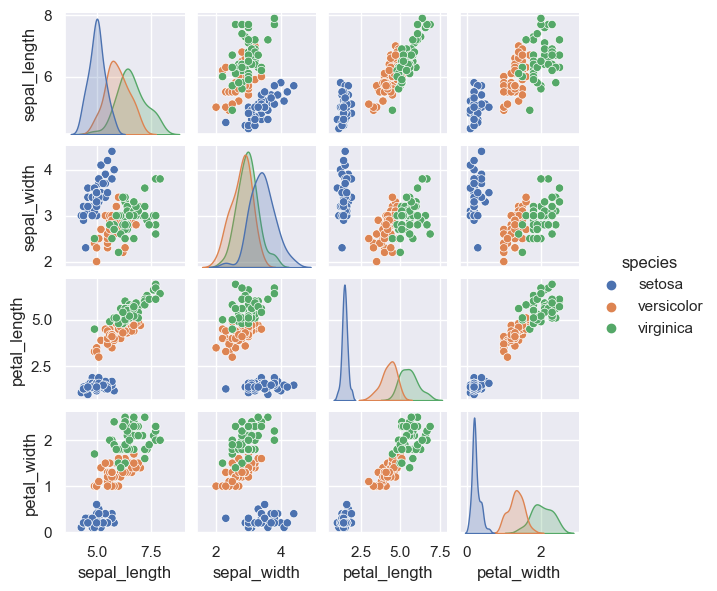

In [18]:
sns.pairplot(iris, hue='species', height=1.5)

In [28]:
# извлечем матрицу признаков
x = iris.drop('species', axis=1)
# извлечем целеовой массив
y = iris['species']

Мы собираемся проверить работу модели на неизвестных ей данных, так что необходимо разделить данные на обучающую последовательность (training set) и контрольную последовательность (testing set)

In [29]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(x, y, random_state=1)

In [30]:
# выбираем класс модели и создаем экземпляр модели
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()

In [31]:
# обучаем модель и предсказываем значения на тестовой выборке
model.fit(Xtrain, Ytrain)
y_model = model.predict(Xtest)

In [32]:
# утилита accuracy_score для выяснения того, какая часть предсказанных меток соответствует истинному значению
from sklearn.metrics import accuracy_score
accuracy_score(Ytest, y_model)

0.9736842105263158

Точность превышает 97%, поэтому для этого конкретного набора данных даже очень наивный алгоритм классификации оказывается эффективным!

## Понижение размерности набора данных Iris

Задача понижения размерности заключается в выяснении, существует ли подходящее представление более низкой размерности, сохраняющее существенные признаки данных. Зачастую понижение размерности используется для облегчения визуализации данных.

метод главных компонент - PCA

In [33]:
from sklearn.decomposition import PCA
model = PCA(n_components=2)
model.fit(x)
X_2D = model.transform(x)

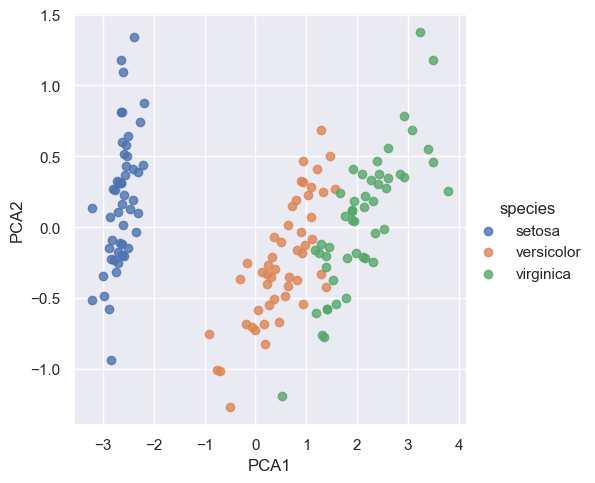

In [47]:
iris['PCA1'] = X_2D[:, 0]
iris['PCA2'] = X_2D[:, 1]
sns.lmplot(x="PCA1", y="PCA2", hue='species', data=iris, fit_reg=False)

## Кластеризация набора данных Iris

Алгоритм кластеризации пытается выделить группы данных безотносительно к каким-либо меткам.

мощный алгоритм кластеризации - смесь Гауссовых распределений (Gaussian mixture model, GMM). Метод GMM состоит в попытке моделирования данных в виде набора Гауссовых пятен.

In [53]:
from sklearn.mixture import GaussianMixture
model = GaussianMixture(n_components=3, covariance_type='full')
model.fit(x)
y_GMM = model.predict(x)

In [56]:
iris['cluster'] = y_GMM
iris['cluster'].value_counts()

2    55
1    50
0    45
Name: cluster, dtype: int64

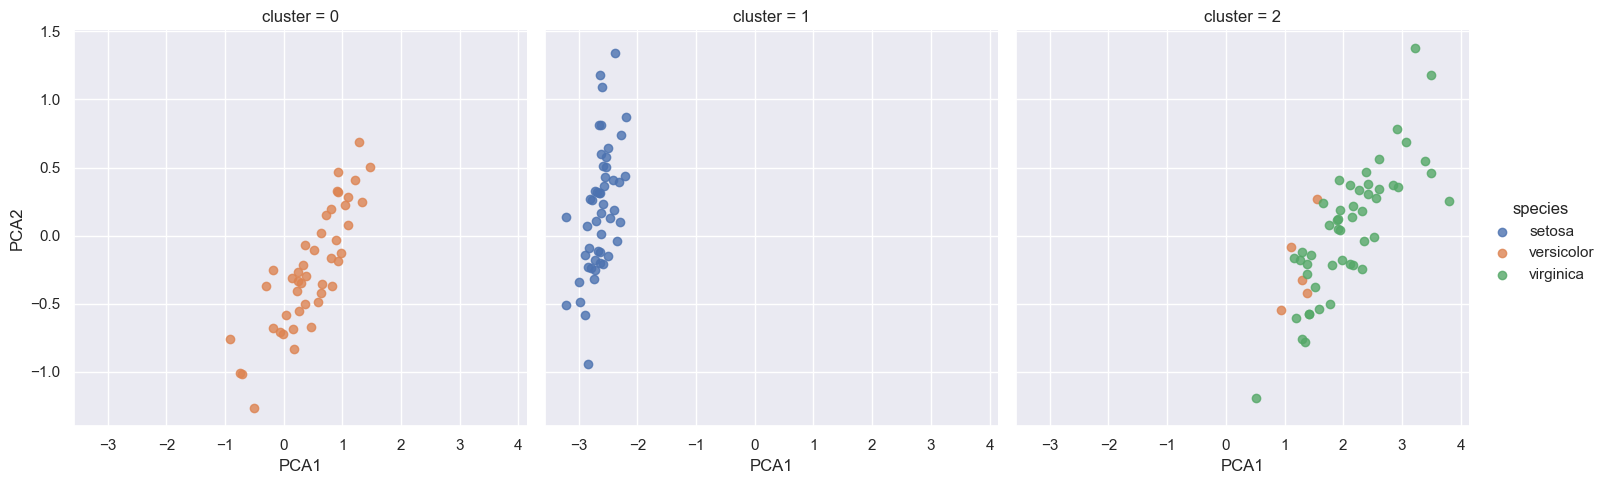

In [58]:
sns.lmplot(x="PCA1", y="PCA2", hue='species', data=iris, col='cluster', fit_reg=False)

Вид setosa идеально выделен в кластер 0, правда, небольшое количество экземпляров видов versicolor и virginica смешались между собой